### Section 1: Import the Libaray
### Section 2: Loading the data
### Section 3: Data preprocessing
### Section 3.1:Removing Stopwords,Symbols
### Section 3.2:Tokenization,Steaming,Limetization 
### Section 4:Visoaulization 
### Section 5:Training Model using Naive Bayes 
### Section 6:Training Model using SVM

# Section 1

In [1]:
import pandas as pd 
import numpy as np
#============= Matplotlib for ploting ====
import matplotlib.pyplot as plt
#====== SKlearn NaiveBayes and SVM ====
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#=============== Crosss validation 
from sklearn.model_selection import train_test_split
#=========Regular Expression===
import re
#================= NLTK
from nltk.stem.porter import *
#========
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk  
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

class methods descriptions
head : returns certain number of top/least occuring tweets. airline_sentiment and text specify functionality
plot : plots ceratin tweets in ceratin plot format and name arguments specify functionality
supported plots : pie, bar(airline, airline_sentiment), Top return of "American", "Delta", "Southwest", "US Airways", "United","Virgin America" ]:
and etc..

x_train : 'formats' given value to unified format for training/prediction in model.
y_train : 'formats' given labels to numerical form(simply index)
fit : simplys calls fit function for self.__model. Can take both formatted/non formatted form. Shuffles data by default
predict : simplys calls predict function for self.__model. Can return in both numerical or string.
>> supported models : DecisionTree, LogisticRegression.
to_csv : simply puts given list of predicted elements into csv file format with given name. Can specifiy name of columns with argument.

# Section 2

In [3]:
data=pd.read_csv("Tweets.csv")

In [4]:
data.head() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
set=[]
for i in data["airline_sentiment"]:
    if i == "positive":
        set.append(1)
    elif i== "negative":
        set.append(-1)
    else :
        set.append(0)


In [7]:
data["sent"]=set
#data= data.drop("airline_sentiment", axis=1)

In [8]:
def add_space_between_emojies(text):
  # Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
        "])"
  )
    
    text = re.sub(EMOJI_PATTERN, r' \1 ', text)
    text=text.lower()
    text=re.sub("[@ #...]"," ",text)
    return text

# Section 3
#Ploting

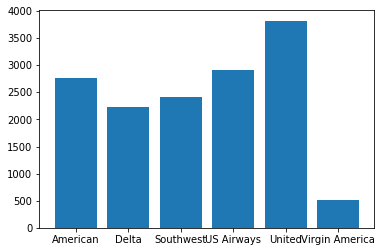

In [9]:
newdata=data.groupby('airline')['airline_sentiment'].count()
plt.bar(["American", "Delta", "Southwest", "US Airways", "United","Virgin America" ], newdata)
plt.show() 



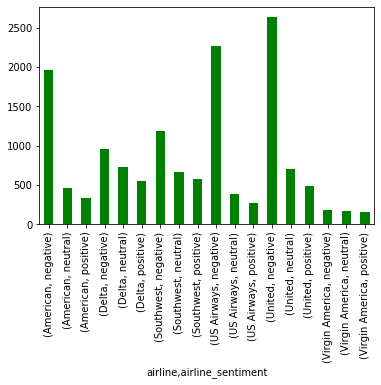

In [10]:
ndata=data.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()
ax=plt.subplot(1,1,1)
labels=["American", "Delta", "Southwest", "US Airways", "United","Virgin America" ]
y=ndata.values
ndata.plot(kind='bar',y='ax',color='green')
plt.show()



In [11]:
ndata.plot(kind='line', color='red', ax=ax)
plt.show()

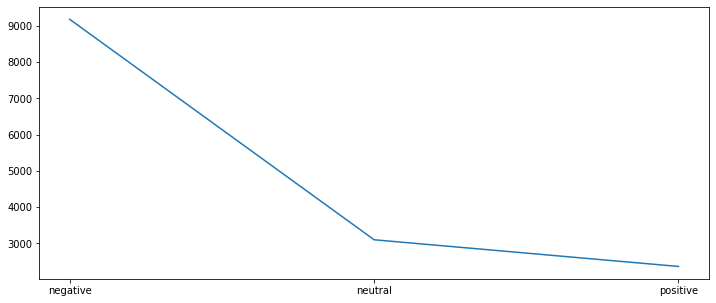

In [12]:
pos= data.groupby('airline_sentiment')['airline_sentiment'].count()
plt.figure(figsize=(12,5))
plt.plot(pos)
plt.show()

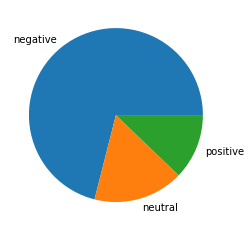

In [13]:
dataset= data[data['airline']=='American'].groupby('airline_sentiment')['airline'].count()
#plt.pie(dataset, dataset= data[data['airline']=='American'].groupby('airline_sentiment')['airline']).count()
labels=('negative', "neutral", "positive")
plt.pie(dataset, labels=labels)
plt.show()


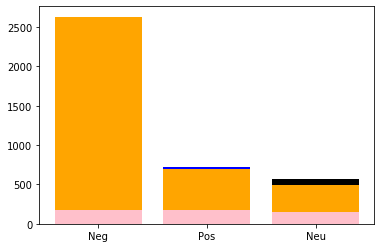

airline_sentiment
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [14]:
colors=["red","blue","black","yellow","orange","pink"]
j=0
for i in ["American", "Delta", "Southwest", "US Airways", "United","Virgin America" ]:
    dataset=""
    dataset= data.loc[data['airline']==i]
    dataset=dataset.groupby('airline_sentiment')['airline_sentiment'].count()
    plt.bar(["Neg","Pos","Neu"],dataset,color=colors[j])
    j=j+1
    
plt.show()
print(dataset)



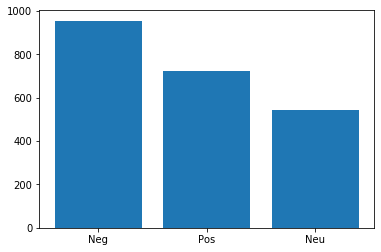

In [15]:
    dataset= data.loc[data['airline']=="Delta"]
    dataset=dataset.groupby('airline_sentiment')['airline_sentiment'].count()
    #plt.xlabel("American", "Delta", "Southwest")
    #plt.ylabel("Number purchsed", "US Airways", "United","Virgin America")
    plt.bar(["Neg","Pos","Neu"],dataset)
    plt.show()

In [16]:
data=data.drop(["tweet_id","retweet_count","negativereason_confidence", "airline_sentiment_confidence", "negativereason", "airline", "airline_sentiment_gold", "name", "negativereason_gold", "tweet_coord", "tweet_created", "tweet_location", "user_timezone" ], axis=1)

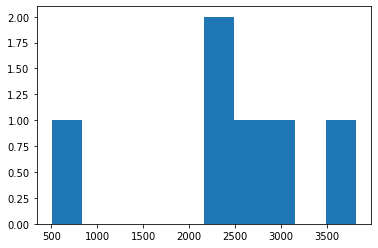

In [17]:
plt.hist(newdata)
plt.show()


# Section 4

In [18]:
stemmer = PorterStemmer()

In [19]:
stop_word=stopwords.words("english")

In [21]:
data.head(6)

,airline_sentiment,text,sent
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,-1
4,negative,@VirginAmerica and it's a really big bad thing...,-1
5,negative,@VirginAmerica seriously would pay $30 a fligh...,-1


In [22]:
cleantext=[]

for i in data['text']:
    
    sent= sent_tokenize(i)
    nst=""
    for j in sent:
        w= word_tokenize(j)
        setence=""
        for k in w:
            if k not in stop_word:
                st=stemmer.stem(k)
                setence+= st+ " "
            nst+=setence
        
    cleantext.append(nst)
        


In [23]:
print(cleantext)   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer,TfidfVectorizer

In [25]:
count = CountVectorizer()

In [26]:
cv=count.fit_transform(cleantext)

In [27]:
cv

<14640x12581 sparse matrix of type '<class 'numpy.int64'>'
	with 154525 stored elements in Compressed Sparse Row format>

In [64]:
y=data["sent"]

# Section 5

In [65]:
x_train, x_test, y_train, y_test= train_test_split(cv, y, test_size=0.2)

In [66]:
model=MultinomialNB()

In [67]:
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
model.score(x_test, y_test) 

0.7127732240437158

In [69]:
model1= LinearSVC()

In [70]:
model1.fit(x_train, y_train) 

/home/kian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [71]:
model1.score(x_test, y_test) 

0.7076502732240437

# Section 6

In [72]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn


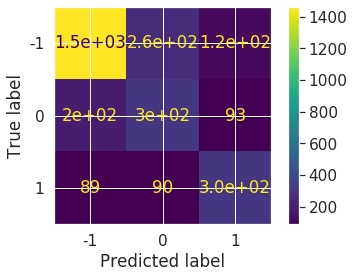

In [73]:
cv, y = make_classification(random_state=0)

plot_confusion_matrix(model1, x_test, y_test)  
plt.show()  

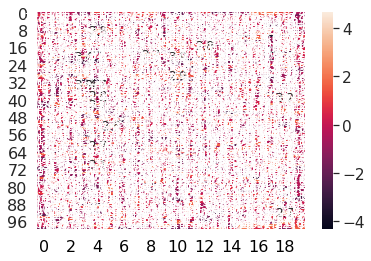

In [74]:
sn.set(font_scale=1.4) 
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
sn.heatmap(cv, annot=True, annot_kws={"size": 12})

plt.show()

# Section 7

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
model2 =KNeighborsClassifier(n_neighbors=8) 

In [77]:
model2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [78]:
model2.score(x_test, y_test) 

0.6526639344262295

# Section 8

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model3=DecisionTreeClassifier()

In [81]:
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
model3.score(x_test, y_test) 

0.6772540983606558

In [83]:
!pip install keras

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
x_train[0].shape

(1, 12581)

In [102]:
model = keras.Sequential()
model.add(keras.Input(shape=())
model.add(layers.Dense(1, activation="relu"))

TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'tuple'.

In [97]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy')

In [98]:
model.fit(x_train, y_train) #hich nis chii

ValueError: Error when checking input: expected input_4 to have 4 dimensions, but got array with shape (11712, 12581)